2440050874 - Michael Julian - LD01

## import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## data preprocessing

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/man-juu/FinalExam_ML/main/knn_datasets.csv")
print(df.head())
print(df.shape)

   X1   X2    X3  X4   X5    X6     X7  X8  X9
0   3  126  88.0  41  235  39.3  0.704  27   0
1   8   99  84.0   0    0  35.4  0.388  50   0
2   7  196  90.0   0    0  39.8  0.451  41   1
3   9  119  80.0  35    0  29.0  0.263  29   1
4  11  143  94.0  33  146  36.6  0.254  51   1
(480, 9)


missing values handling (insert mean value)

In [ ]:
df.isnull().any()

X1    False
X2    False
X3     True
X4    False
X5    False
X6    False
X7    False
X8    False
X9    False
dtype: bool

In [ ]:
df['X3'].fillna(df['X3'].mean(), inplace = True)

In [ ]:
df.isnull().any()

X1    False
X2    False
X3    False
X4    False
X5    False
X6    False
X7    False
X8    False
X9    False
dtype: bool

In [ ]:
X = df.drop(['X9'], axis=1)
y = df[['X9']]
print(X)
print(y)

     X1   X2    X3  X4   X5    X6     X7  X8
0     3  126  88.0  41  235  39.3  0.704  27
1     8   99  84.0   0    0  35.4  0.388  50
2     7  196  90.0   0    0  39.8  0.451  41
3     9  119  80.0  35    0  29.0  0.263  29
4    11  143  94.0  33  146  36.6  0.254  51
..   ..  ...   ...  ..  ...   ...    ...  ..
475   6  166  74.0   0    0  26.6  0.304  66
476   5  110  68.0   0    0  26.0  0.292  30
477   2   81  72.0  15   76  30.1  0.547  25
478   7  195  70.0  33  145  25.1  0.163  55
479   6  154  74.0  32  193  29.3  0.839  39

[480 rows x 8 columns]
     X9
0     0
1     0
2     1
3     1
4     1
..   ..
475   0
476   0
477   0
478   1
479   0

[480 rows x 1 columns]


In [ ]:
counts = np.unique(y, return_counts=True)

for i in range(len(np.unique(y))):
    c = np.unique(y, return_counts=True)
    print(f'Class {c[0][i]}: {c[1][i]}')

Class 0: 311
Class 1: 169


## feature selection

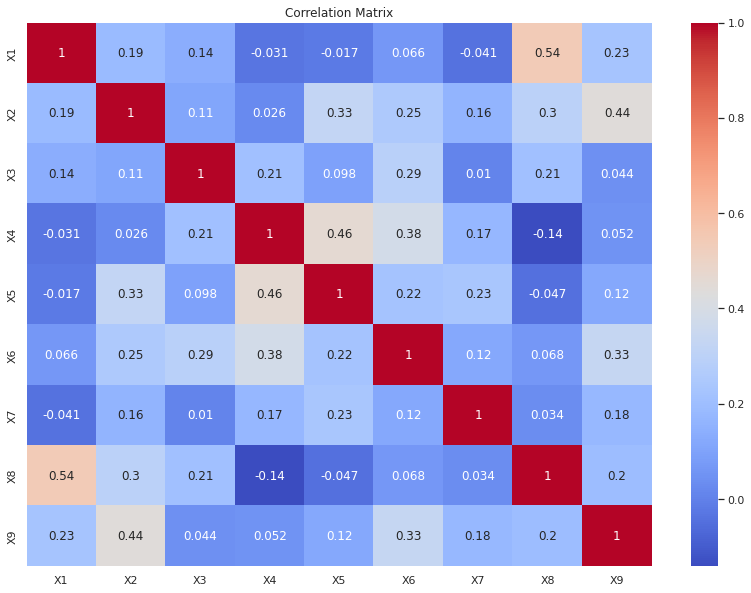

In [ ]:
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(data=df.corr(), cmap='coolwarm',annot=True)
plt.title("Correlation Matrix")
plt.show()

Mengambil 2 variabel independent dengan korelasi tertinggi terhadap target. Maka,

Variabel Independent: **X2(0.44)** dan **X6(0.33)**

In [ ]:
X = df.drop(['X1', 'X3', 'X4', 'X5', 'X7', 'X8', 'X9'], axis=1)
print(X)

      X2    X6
0    126  39.3
1     99  35.4
2    196  39.8
3    119  29.0
4    143  36.6
..   ...   ...
475  166  26.6
476  110  26.0
477   81  30.1
478  195  25.1
479  154  29.3

[480 rows x 2 columns]


## data splitting

In [ ]:
print(X.dtypes)
X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)


X2      int64
X6    float64
dtype: object
(480, 2)
(360, 2)
(120, 2)


## building kNN model

In [ ]:
#kNN classification with euclidean distance
from scipy.stats import mode

class kNN:
  def __init__(self, k, X, y):
    self.k = k
    self.X_train = X
    self.y_train = y

  def euclidean(self, p, q):
    return np.sqrt(np.sum((q - p)**2))

  def predict(self, X_test):
    pred = []

    for x in X_test:
      dist = []

      for train in self.X_train:
        dist.append(self.euclidean(x, train))

      dist = np.array(dist)
      top_k = np.argsort(dist)[:self.k]

      labels = [self.y_train[i] for i in top_k]
      pred.append(mode(labels).mode[0])

    return pred

## optimal k

In [ ]:
from sklearn.metrics import mean_squared_error
error = []
for k in range(1, 50):
  clf = kNN(k, X_train, y_train)
  y_pred = clf.predict(X_test)
  error.append(np.sqrt(mean_squared_error(y_test, y_pred)))

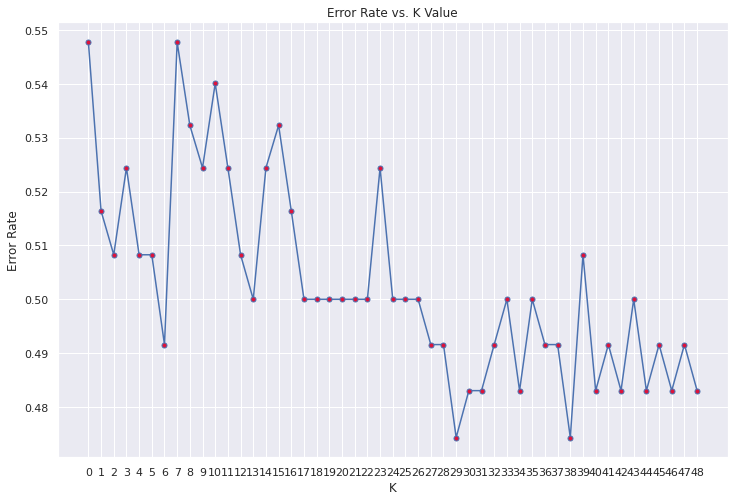

In [ ]:
#Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(error, marker='.', markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xticks(np.arange(0, len(error), 1.0))
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Dari 50 k, **optimal k** (ganjil) berdasarkan graf di atas adalah **29**.

In [ ]:
optimum_k = 29
clf = kNN(optimum_k, X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(y_test, np.array(y_pred))
print(f'Accuracy score with {optimum_k}-NN: {acc*100}%\n')
print(f'Classification Report (Precision & Recall):\n{classification_report(y_test, y_pred)}')

Accuracy score with 29-NN: 75.83333333333333%

Classification Report (Precision & Recall):
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        78
           1       0.71      0.52      0.60        42

    accuracy                           0.76       120
   macro avg       0.74      0.70      0.71       120
weighted avg       0.75      0.76      0.75       120



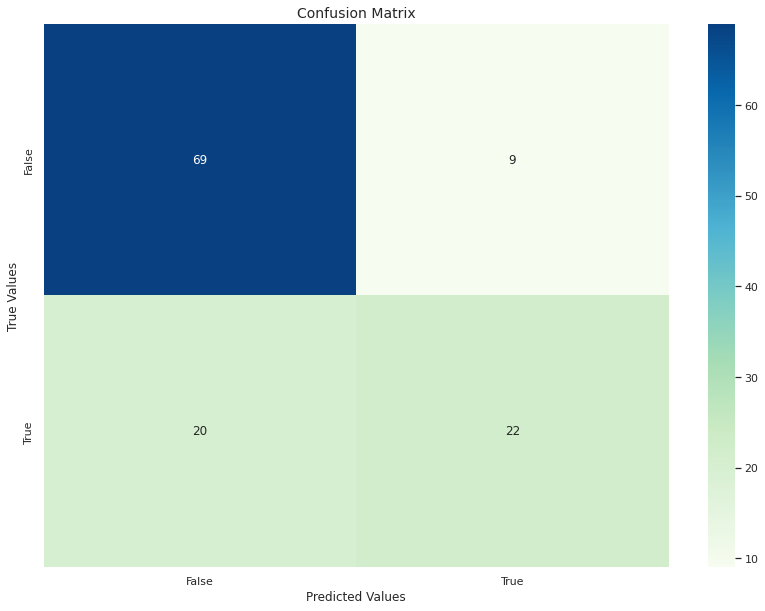

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=(['False','True']), yticklabels=(['False','True']), annot=True, cmap='GnBu')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.show()